# DBSCAN

Density-based Spatial Clustering of applications with Noise works based on density of object. It works on Radius(R) and Minimum number of neighbours(M). <br>
### Advantages :-
* Arbitary shaped clusters
* Robust to outliers
* Does not require specification of number of clusters

In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\ChaitanyaGumudala\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv("WeatherStations.csv")
data = data[pd.notnull(data["Tm"])]
data = data.reset_index(drop=True)

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
llon = -140
ulon = -50
llat = 40
ulat = 65

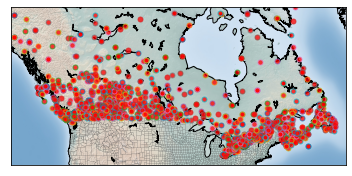

In [5]:
data = data[(data["Long"] > llon) & (data["Long"] < ulon) & (data["Lat"] > llat) &(data["Lat"] < ulat)]
my_map = Basemap(projection="merc", resolution="l", area_thresh=1000.0, llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcounties()
my_map.fillcontinents(color="white", alpha=0.3)
my_map.shadedrelief()
Xs, Ys = my_map(np.asarray(data.Long), np.asarray(data.Lat))
data["Xm"] = Xs.tolist()
data["Ym"] = Ys.tolist()
for index, row in data.iterrows():
    my_map.plot(row.Xm, row.Ym, markerfacecolor=([1,0,0]), marker="o", markersize=5, alpha=0.75)
plt.show()

In [6]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
clust_data = data[["Xm", "Ym"]]
clust_data = np.nan_to_num(clust_data)
clust_data = StandardScaler().fit_transform(clust_data)
db = DBSCAN(eps=0.15, min_samples=10).fit(clust_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
data["Clust_DB"] = labels
real_Cluster_num = len(set(labels)) - (1 if -1 in labels else 0)
cluster_num = len(set(labels))

Cluster : 0 and Average temperature : -5.538747553816051
Cluster : 1 and Average temperature : 1.9526315789473685
Cluster : 2 and Average temperature : -9.195652173913045
Cluster : 3 and Average temperature : -15.300833333333333
Cluster : 4 and Average temperature : -7.769047619047619


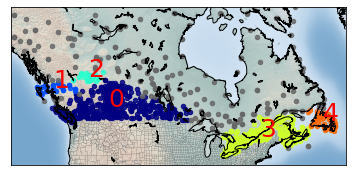

In [7]:
my_map = Basemap(projection="merc", resolution="l", area_thresh=1000.0, llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat)
my_map.drawcoastlines()
my_map.drawcounties()
my_map.fillcontinents(color="white", alpha=0.3)
my_map.shadedrelief()
colors = plt.get_cmap("jet")(np.linspace(0.0, 1.0, cluster_num))
for clust_number in set(labels):
    c = (([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int64(clust_number)])
    clust_set = data[data.Clust_DB == clust_number]
    my_map.scatter(clust_set.Xm, clust_set.Ym, color=c, marker='o', s=20, alpha=0.85)
    if clust_number != -1:
        cenx = np.mean(clust_set.Xm)
        ceny = np.mean(clust_set.Ym)
        plt.text(cenx, ceny, str(clust_number), fontsize=25, color="red")
        print("Cluster : {} and Average temperature : {}".format(str(clust_number), str(np.mean(clust_set.Tm))))
plt.show()